In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf # ticker data 
from pandas_datareader import data as pdr # market proxy and treasury rates data
import datetime as dt
from numpy import nan
from time import sleep
import concurrent.futures
from functools import reduce
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import scipy 
import time
from datetime import datetime, timedelta
import requests

from dateutil.relativedelta import relativedelta
#Will Version monthly 1

In [2]:
tickers = ['XLC', 'XLY', 'XLP', 'XLE', 'XLF', 'XLI', 'XLB', 'XLRE', 'XLV', 'XLK', 'XLU']

START_DATE = '2018-12-31'
years=4


# Convert start_date string to datetime object
start_date_dt = datetime.strptime(START_DATE, '%Y-%m-%d')

# Add 6 years to start_date
end_date_dt = start_date_dt + relativedelta(years=years)

# Convert end_date_dt back to string format
END_DATE = end_date_dt.strftime('%Y-%m-%d')

print("End Date is:",END_DATE)




End Date is: 2022-12-31


In [3]:

# Convert START_DATE to a datetime object
start_date_obj = datetime.strptime(START_DATE, '%Y-%m-%d')

# Calculate the previous month's date
previous_month_start_date = (start_date_obj - relativedelta(months=12)).strftime('%Y-%m-%d')#get correlation from past year
#print(previous_month_start_date)


#initial DF
asset_df = yf.download(tickers[0], start=previous_month_start_date, end=END_DATE, progress=False)
asset_df


y = asset_df['Adj Close'].resample('M') \
                         .last() \
                         .pct_change() \
                         .dropna()

y.index = y.index.strftime('%Y-%m')
y.name = tickers[0]
df = pd.DataFrame(y)
#df.reset_index(inplace=True)

for x in range(1,len(tickers)):
    asset_df = yf.download(tickers[x], start=previous_month_start_date, end=END_DATE, progress=False)
    y = asset_df['Adj Close'].resample('M') \
                             .last() \
                             .pct_change() \
                             .dropna()
    y.index = y.index.strftime('%Y-%m')
    y.name = tickers[x]
    ydf = pd.DataFrame(y)
    df = pd.concat([df, ydf], axis=1)

df.reset_index(drop=True, inplace=True)
PastReturns_df=df
PastReturns_df.fillna(0, inplace=True)

PastReturns_df.head()

,XLC,XLY,XLP,XLE,XLF,XLI,XLB,XLRE,XLV,XLK,XLU
0,-0.021603,0.018024,0.039589,0.015539,0.051147,0.073852,0.028586,0.010395,0.065540,0.020872,0.015974
1,0.014858,0.051047,0.003920,-0.034751,0.013596,0.002340,-0.007701,0.024205,0.043293,0.065990,0.012881
2,-0.000963,0.005304,0.009872,0.024460,-0.022155,0.021773,-0.017954,-0.026461,0.029542,-0.000193,-0.006484
3,-0.060408,-0.101007,0.020026,-0.113282,-0.047136,-0.108673,-0.091835,-0.015946,-0.067788,-0.080048,0.019753
4,-0.022372,0.024768,0.022723,-0.015634,0.026256,0.038066,0.038016,0.054846,0.080834,-0.019625,0.035388


In [4]:

 # Create a date range from START_DATE to END_DATE with a monthly frequency
date_range = pd.date_range(start=START_DATE, end=END_DATE, freq='M')

    # Create an empty DataFrame with the date_range as the index
date_range_df = pd.DataFrame(index=date_range)
date_range_df

    # Specify the stocks
stocks = tickers



    # Create columns for each stock and initialize them with NaN values
for stock in stocks:
    date_range_df[stock] = pd.Series(dtype=float)

date_range_df.head()

,XLC,XLY,XLP,XLE,XLF,XLI,XLB,XLRE,XLV,XLK,XLU
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


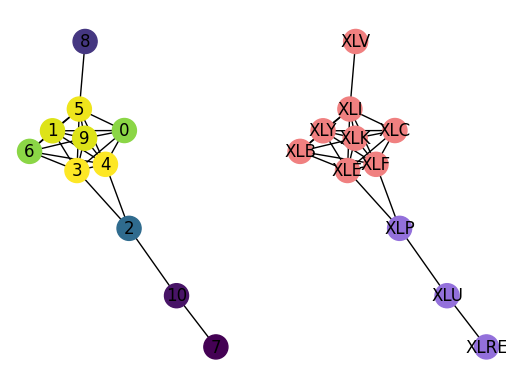

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


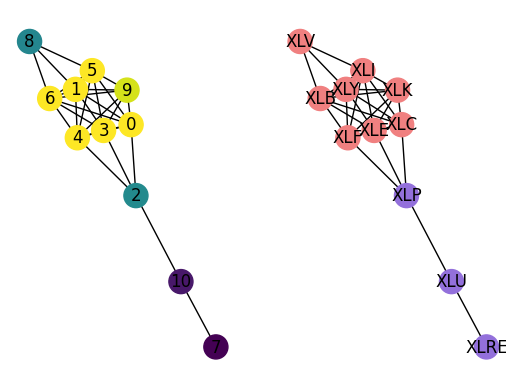

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


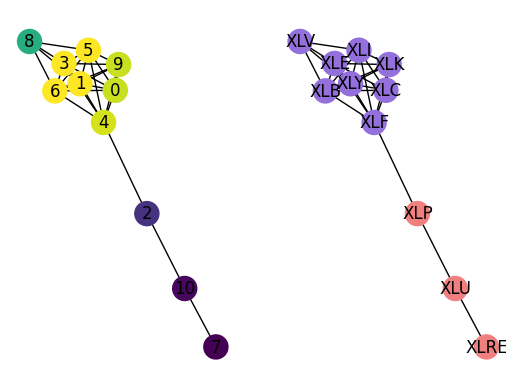

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


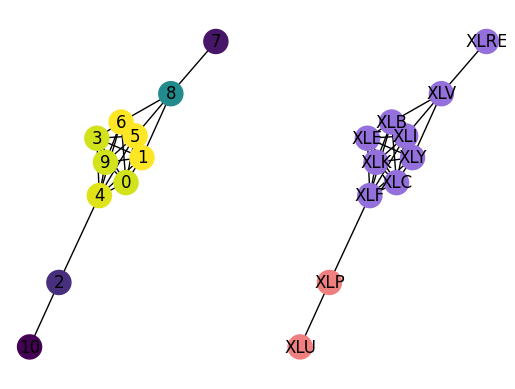

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


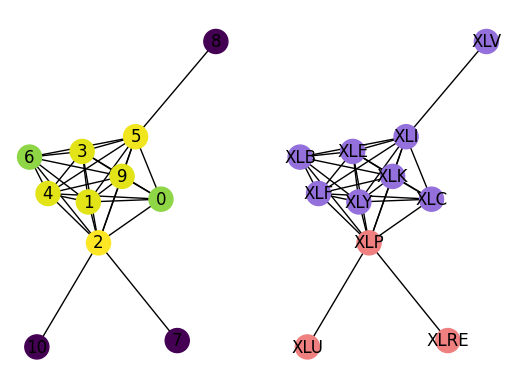

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


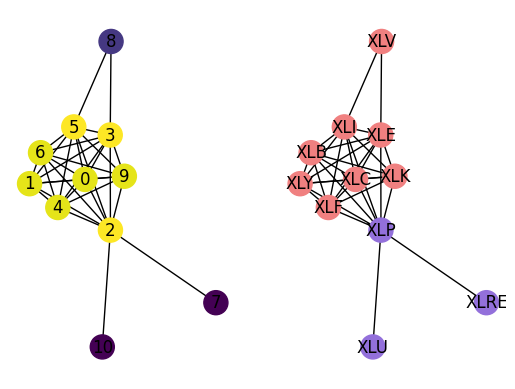

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


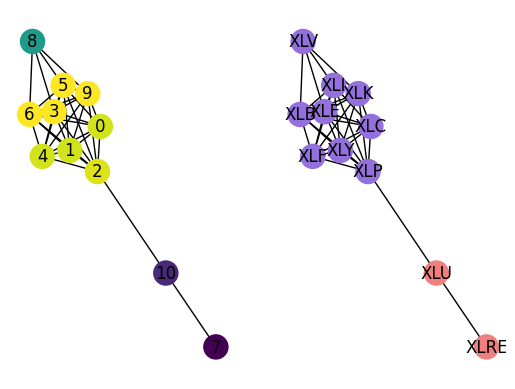

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


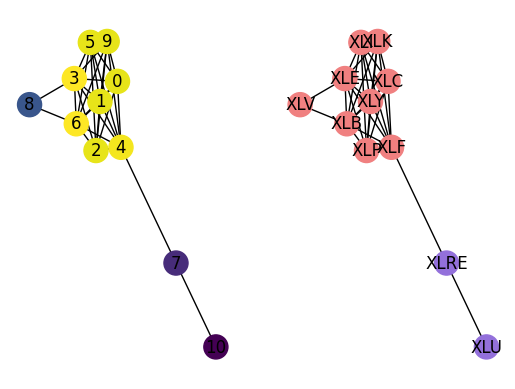

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


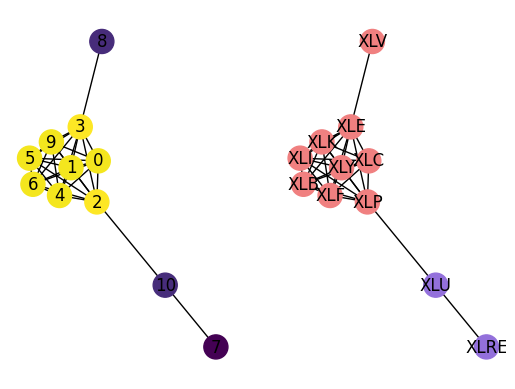

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


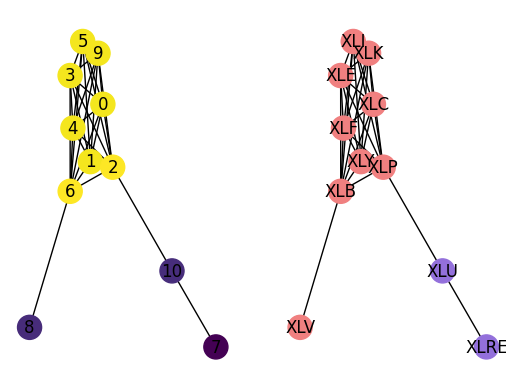

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


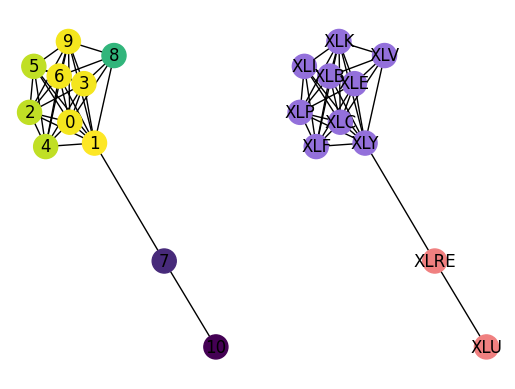

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


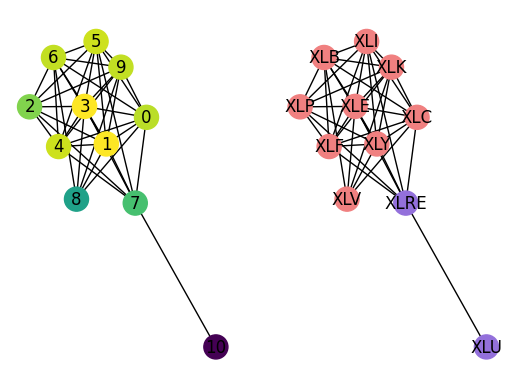

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


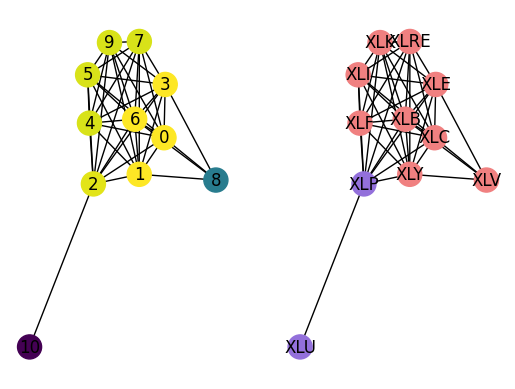

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


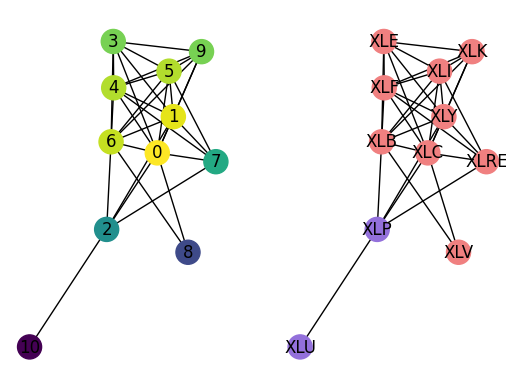

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


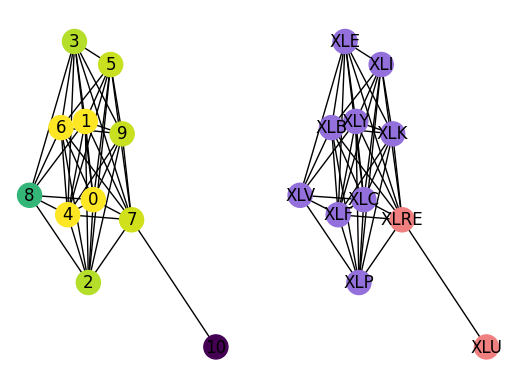

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


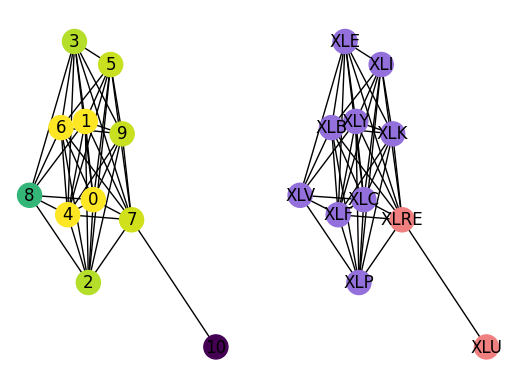

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


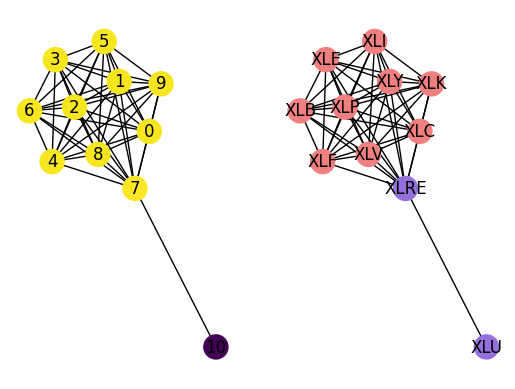

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


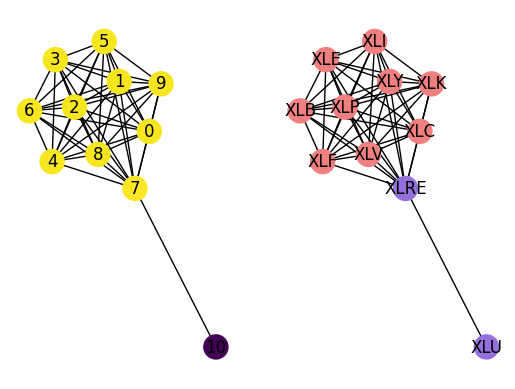

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


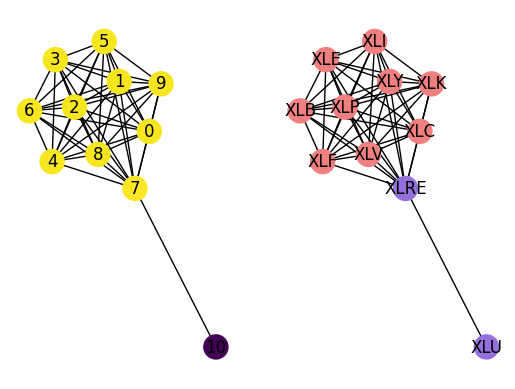

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


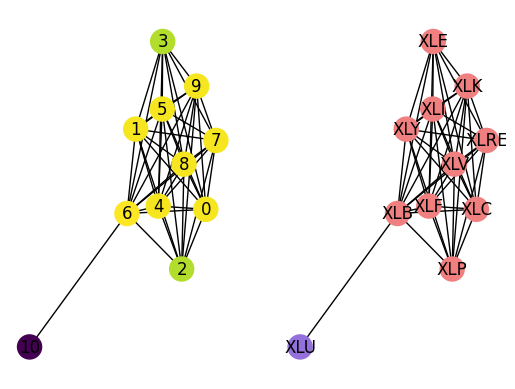

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


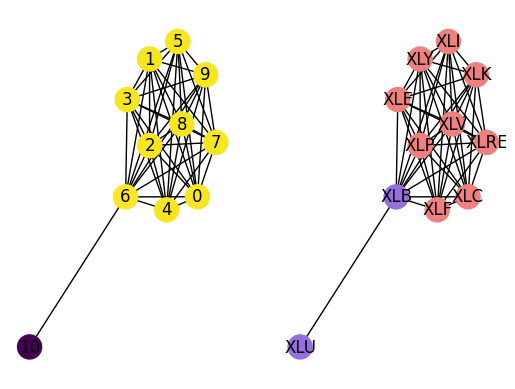

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


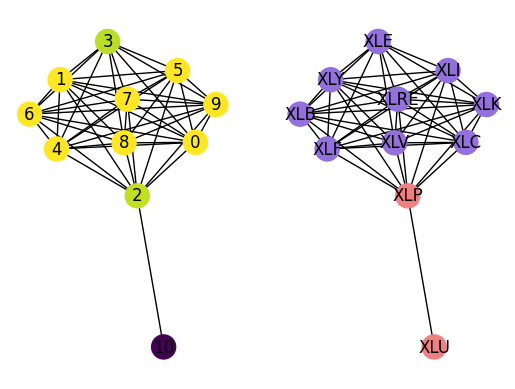

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


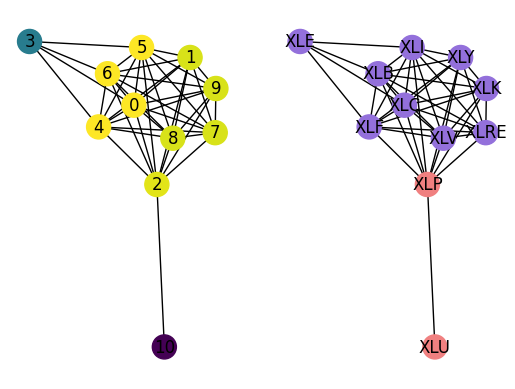

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


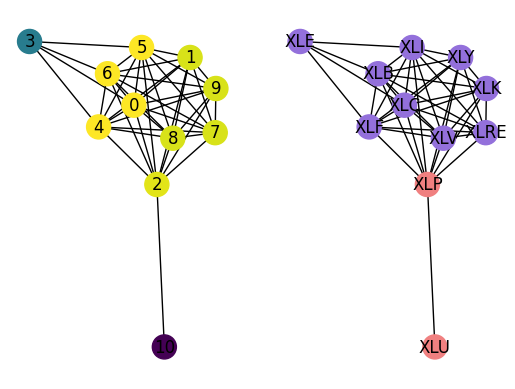

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


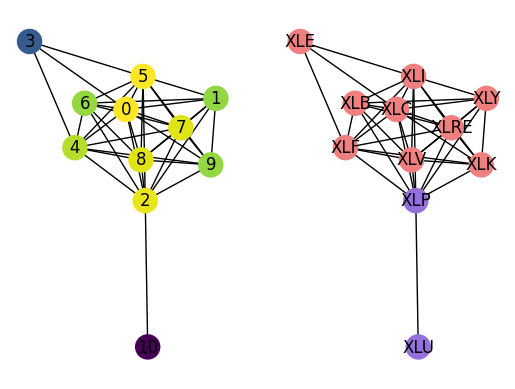

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


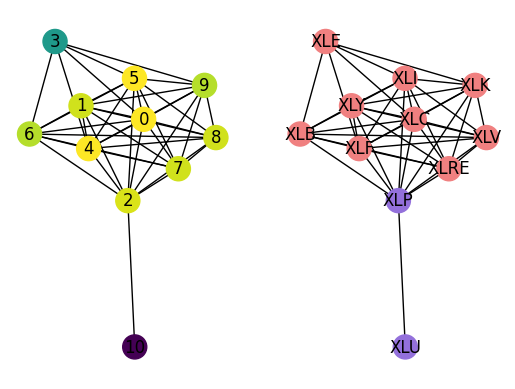

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


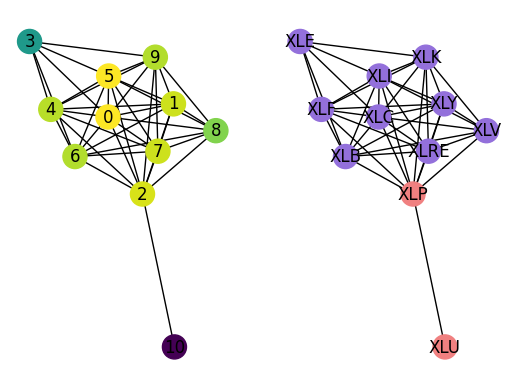

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


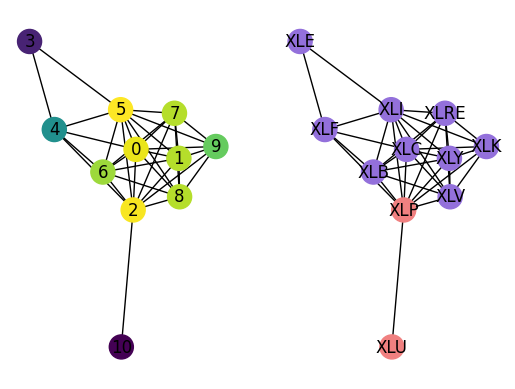

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


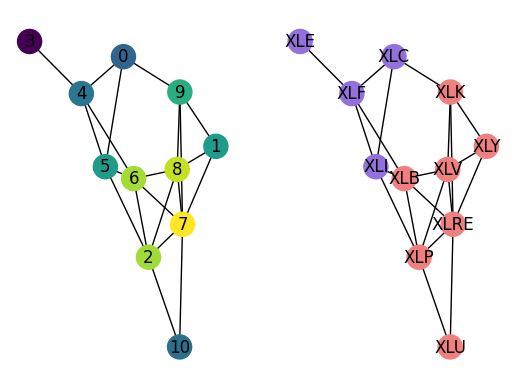

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


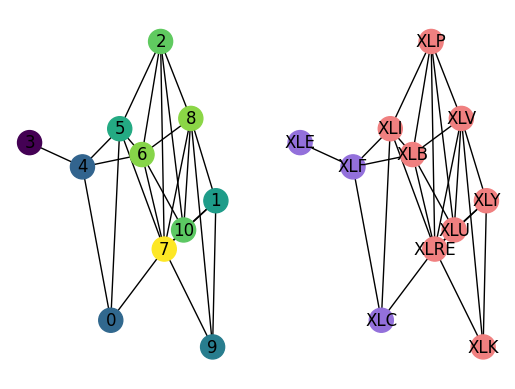

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


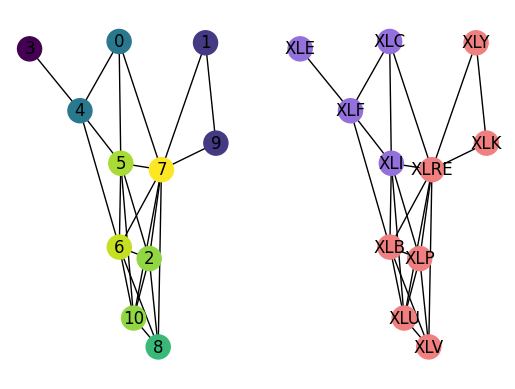

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


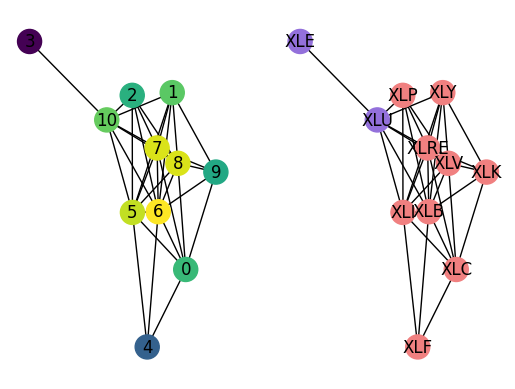

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


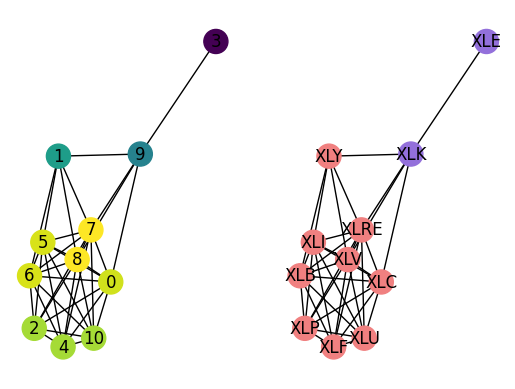

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


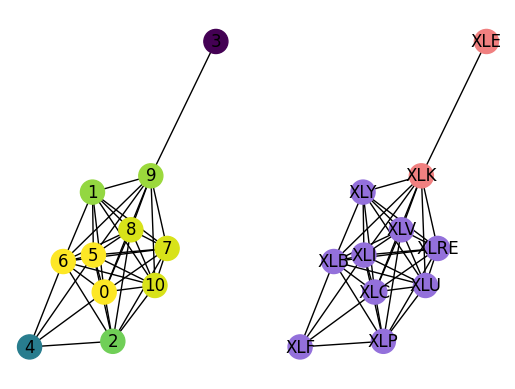

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


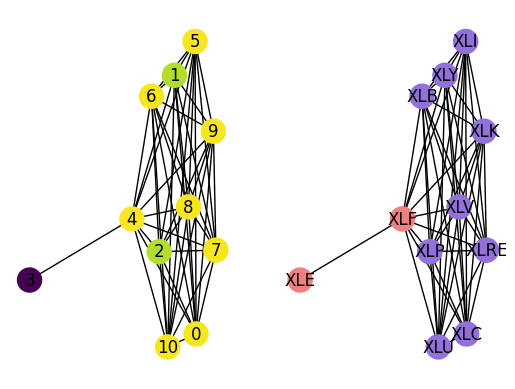

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


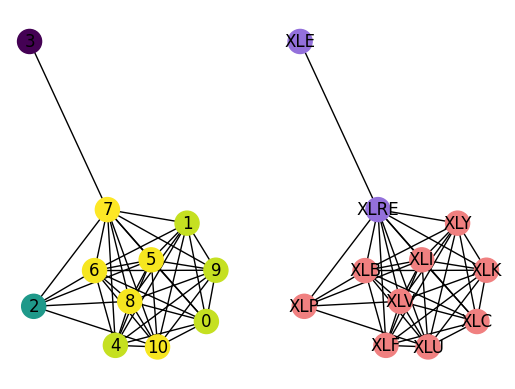

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


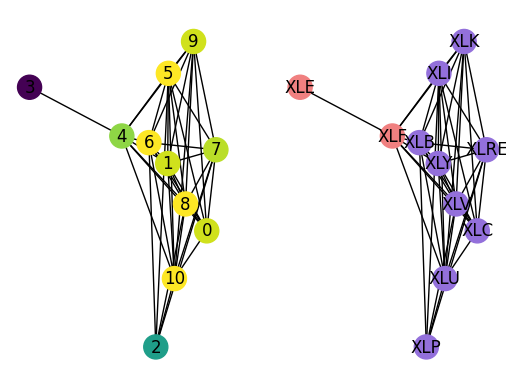

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


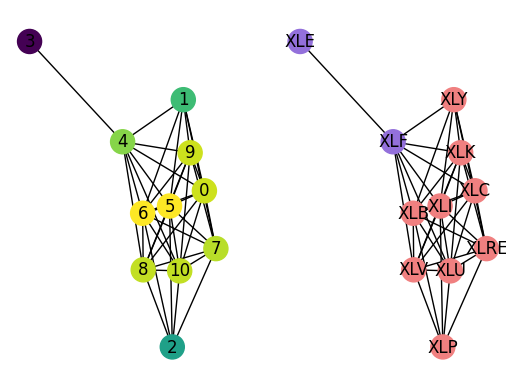

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


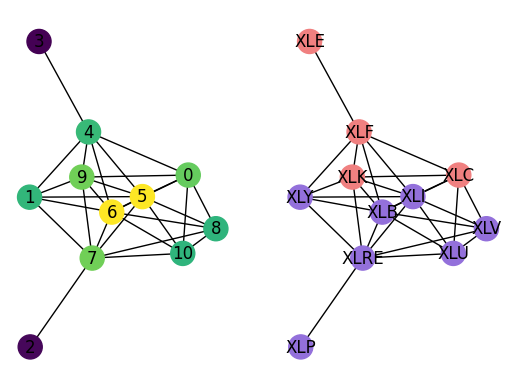

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


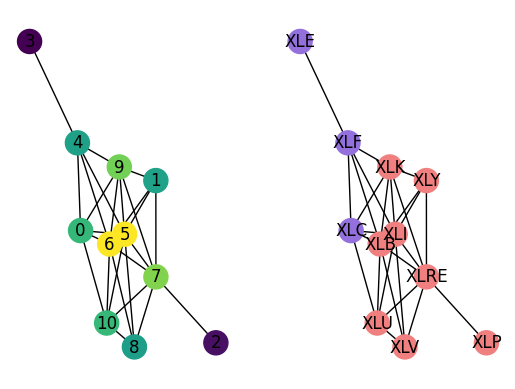

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


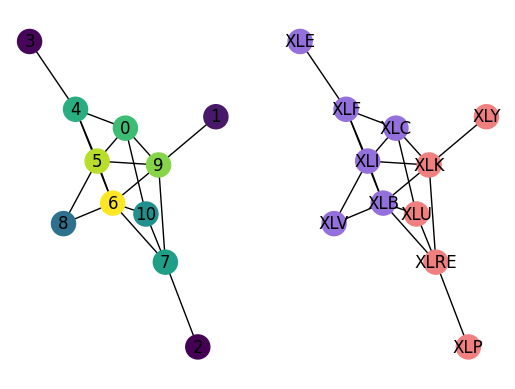

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


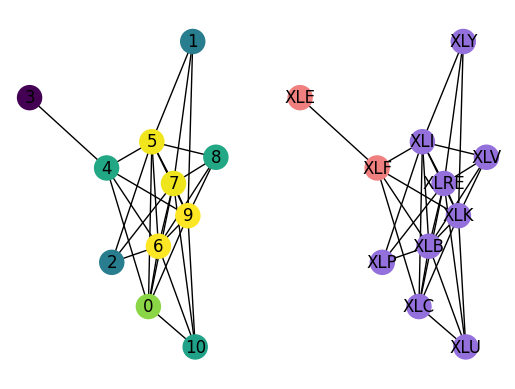

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


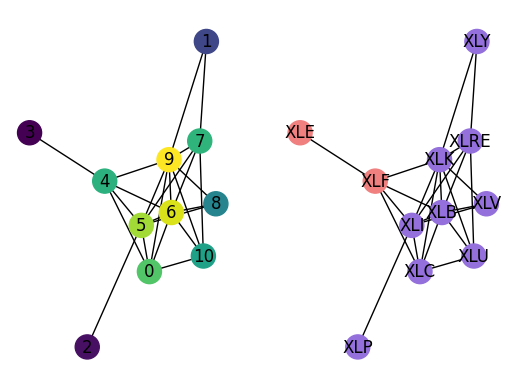

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


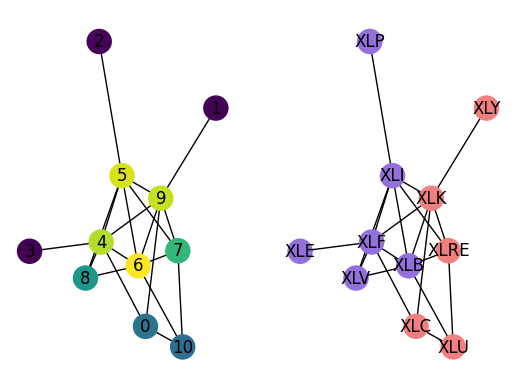

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


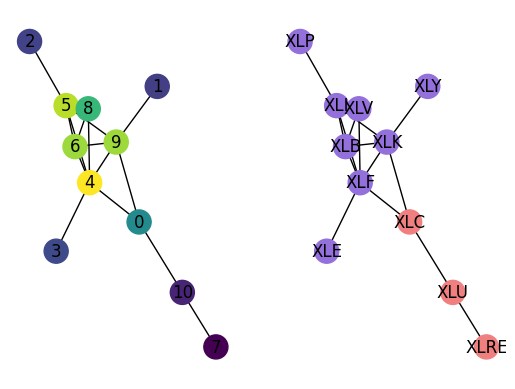

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


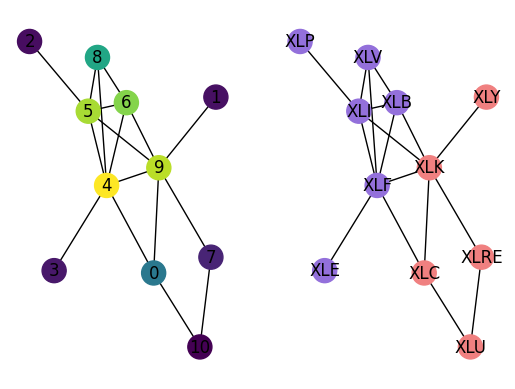

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


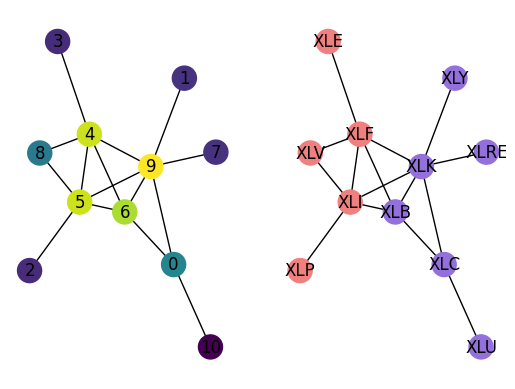

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


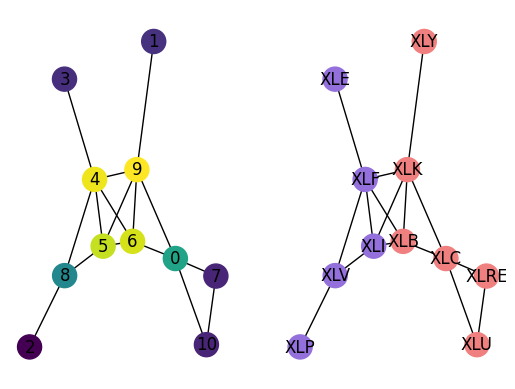

/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated=corr.applymap(truncate)
/var/folders/0f/pslgclyj7tx7mwrxw99wp0t40000gn/T/ipykernel_6768/193839790.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))


Connected Graph Found


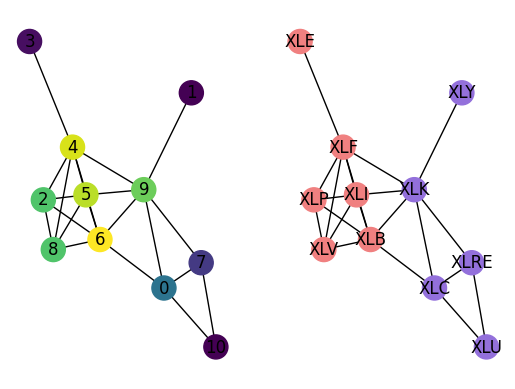

In [5]:
for x in range (years*12+1): 
    Last_12_months = PastReturns_df.iloc[x:12+x] #get the past 12 months data 
    returns_pct=Last_12_months
    corr = returns_pct.corr() # calculate the correlations between the returns of each pair of stocks
    #sns.heatmap(corr,annot=True,cmap="coolwarm")   USE THIS FOR GRAPHICS
    corr_df = pd.DataFrame(corr)
    titles = corr_df.columns.tolist()
    
    def truncate(f,relaxer=.99): 
        if (abs(f) < relaxer):
            return 0
        else:
            return 1
    relaxer=.9999
    truncated=corr.applymap(truncate)
    # we already know that every stock is perfectly correlated with itself, so the ones on the diagonal are not really useful information. Let's get rid of them.
    adj = truncated- np.identity(len(tickers))
    stocknet = nx.from_numpy_array(adj.to_numpy()) # initialize a new graph from our adjacency matrix

    while nx.is_connected(stocknet)==False:
        relaxer=relaxer-.0001
        truncated=corr.applymap(truncate)
        adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(len(tickers))
        stocknet = nx.from_numpy_array(adj.to_numpy()) # initialize a new graph from our adjacency matrix
    else:
        print("Connected Graph Found")
        #print(relaxer)

    IndexedStocknet=stocknet
    Indexedstock_layout = nx.spring_layout(IndexedStocknet,seed=10)
    stocknet = nx.relabel_nodes(stocknet, dict(enumerate(adj.columns))) # keep the stock tickers as the names of the nodes (instead of integers)
    stock_layout = nx.spring_layout(stocknet,seed=10) # fix our layout
    L = nx.laplacian_matrix(stocknet).todense()
    (u,v) = np.linalg.eig(L)
    u_sorted = np.sort(u)
    v_sorted = v[:, u.argsort()]
    colors = [ "lightcoral" for i in range(0,len(tickers)) ]
    for i in range(0,len(tickers)):
        if (v_sorted[i,1] < 0):
            colors[i] = "mediumpurple"


    eigen_cent = nx.eigenvector_centrality(IndexedStocknet)
    eigen_colors = [eigen_cent[i] for i in range(0,len(tickers))]
    fig, (ax1, ax2) = plt.subplots(ncols=2)

    # Draw the graphs in the subplots
    nx.draw(IndexedStocknet,Indexedstock_layout,node_color=eigen_colors,with_labels=True,ax=ax1)
    nx.draw(stocknet,stock_layout,node_color=colors,with_labels=True,ax=ax2)

    plt.show()
    
    df = pd.DataFrame(eigen_cent,index=[0])
    dfT= pd.DataFrame(titles)
    # print the resulting DataFrame
    mat1=df.T
    mat2=dfT
    Centrality_results = mat1.values.flatten().tolist()
    date_range_df.loc[date_range[x]] = Centrality_results

    


In [6]:


date_range_df.head()


,XLC,XLY,XLP,XLE,XLF,XLI,XLB,XLRE,XLV,XLK,XLU
2018-12-31,0.330756,0.378838,0.139973,0.399186,0.399186,0.388443,0.330756,0.004171,0.066074,0.378838,0.024519
2019-01-31,0.369636,0.368998,0.177422,0.369636,0.369636,0.368998,0.368998,0.004426,0.172696,0.345692,0.028370
2019-02-28,0.346814,0.378888,0.056888,0.378888,0.354510,0.378888,0.378888,0.001428,0.237097,0.346814,0.009124
2019-03-31,0.357648,0.383785,0.060168,0.357648,0.365956,0.383785,0.383785,0.030324,0.189297,0.357648,0.009639
2019-04-30,0.318355,0.359006,0.372948,0.359006,0.359006,0.365844,0.318355,0.054593,0.053553,0.359006,0.054593


In [7]:

file_path = 'CentralityData1.xlsx'
date_range_df.to_excel(file_path, index=True)

